In [166]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from ggplot import *

#from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [167]:
#import re

In [168]:
df=pd.read_csv('Dist_Modis.csv')

In [169]:
df.head()

,DISTRICT,PK,Water,Evergreen Needleleaf forest,Evergreen Broadleaf forest,Deciduous Needleleaf forest,Deciduous Broadleaf forest,Mixed forest,Closed shrublands,Open shrublands,Woody savannas,Savannas,Grasslands,Permanent wetlands,Croplands,Urban and built-up,Cropland/Natural vegetation mosaic,Snow and ice,Barren or sparsely vegetated
0,South Andaman,640,94.9,0.558938,1920.0,1.489138,3.624205,27.7,0.184983,0.000000,11.600000,1.800511,0.933582,282.000000,10.600000,13.100000,59.6,0.075611,0.491767
1,Nicobar,638,99.6,0.374300,1230.0,0.695424,0.403167,17.9,0.000000,0.000000,4.116979,0.000000,2.631591,241.000000,5.819983,0.882904,88.9,0.112488,3.827191
2,North & Middle Andaman,639,104.0,1.850700,2640.0,1.946545,5.453928,38.6,0.406758,0.231974,64.500000,3.050149,1.000333,340.000000,7.759433,0.000000,161.0,0.447024,0.094551
3,Lawangtlai,287,0.0,0.000000,1070.0,0.000000,0.000000,20.6,0.000000,0.000000,868.000000,1.335548,0.000000,0.184118,2.711483,0.000000,29.0,0.000000,0.000000
4,Lunglei,286,0.0,0.000000,3890.0,0.000000,0.000000,44.3,0.000000,0.000000,565.000000,0.819342,0.000000,0.230629,1.947699,0.000000,17.3,0.000000,0.000000


In [170]:
X=df['Urban and built-up']
X.shape

(640,)

In [175]:
#X1=df.dropna(subset=['Urban and built-up'])
urban='Urban and built-up'
#X1 = df.drop(df['Urban and built-up']==0)
X1 = df[df['Urban and built-up'] > 0]

#X1=df[df['Urban and built-up'!=0.0]]
#m=df.drop(df['Urban and built-up'] is 0)


,DISTRICT,PK,Water,Evergreen Needleleaf forest,Evergreen Broadleaf forest,Deciduous Needleleaf forest,Deciduous Broadleaf forest,Mixed forest,Closed shrublands,Open shrublands,Woody savannas,Savannas,Grasslands,Permanent wetlands,Croplands,Urban and built-up,Cropland/Natural vegetation mosaic,Snow and ice,Barren or sparsely vegetated
0,South Andaman,640,94.900000,0.558938,1920.0,1.489138,3.624205,27.7,0.184983,0.0,11.600000,1.800511,0.933582,282.000000,10.600000,13.100000,59.6,0.075611,0.491767
1,Nicobar,638,99.600000,0.374300,1230.0,0.695424,0.403167,17.9,0.000000,0.0,4.116979,0.000000,2.631591,241.000000,5.819983,0.882904,88.9,0.112488,3.827191
8,Lower Dibang Valley,258,10.500000,286.000000,877.0,0.236435,1.574910,3350.0,5.824916,80.1,232.000000,16.800000,392.000000,19.900000,109.000000,2.960215,278.0,24.600000,1.824287
12,Sivasagar,311,0.084482,0.000000,142.0,0.000000,0.000000,10.9,0.642406,16.0,454.000000,9.667729,6.067683,3.975134,1460.000000,9.204755,517.0,0.000000,2.053434
14,Lohit,259,2.833850,86.900000,0.0,0.194127,2.141042,1130.0,12.300000,23.8,305.000000,37.100000,94.500000,36.900000,138.000000,2.631680,404.0,0.473582,0.893446


In [177]:
df_mod=X1

In [181]:
Input=df_mod['Urban and built-up']
#Input.shape
Xreshaped=Input.values.reshape(-1,1)
#Xreshaped.shape
#Xreshaped

In [182]:
Xreshaped[0]

array([13.1])

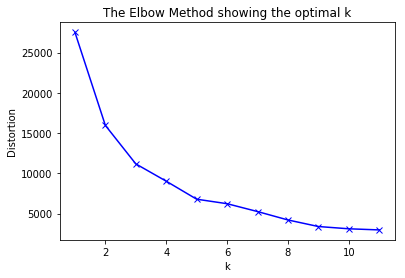

In [183]:
K = range(1,12)

#X.values.reshape(-1,1)
distortions=[]
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(Xreshaped)
    kmeanModel.fit(Xreshaped)
    distortions.append(sum(np.min(cdist(Xreshaped, kmeanModel.cluster_centers_, 'euclidean'), axis=1)))
 #distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])   
###Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [185]:
kmeanModel = KMeans(n_clusters=3).fit(Xreshaped)
df_labels= pd.DataFrame(data={'DIST_CODE':df_mod.PK,'DISTRICT':df_mod.DISTRICT, 'LABELS' :kmeanModel.labels_})
#df_labels.groupby('DISTRICT_CDF_Labels_avg_rad').count()

In [129]:
#df_labels

In [186]:
df_labels.groupby('LABELS').size()

LABELS
0    414
1     40
2    132
dtype: int64

In [125]:
df_labels.to_csv('MODIS_DIST_LEVEL_CLUSTERING.csv')


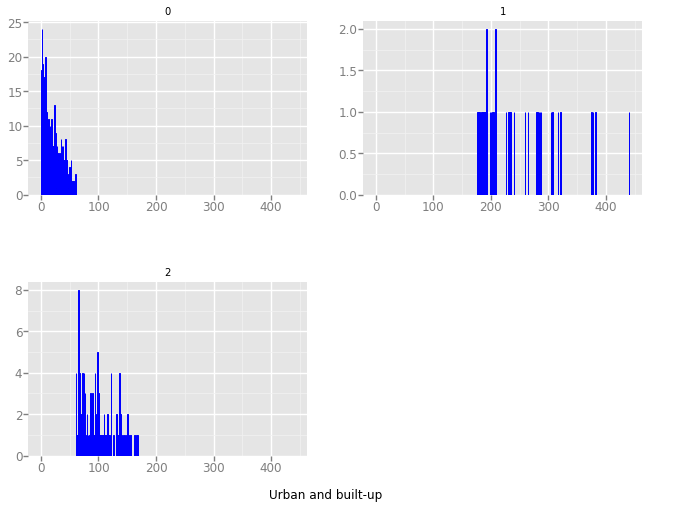

In [187]:
df_cdfVill=df_mod.merge(df_labels, left_on= 'PK' ,right_on='DIST_CODE', how='left')
#df_cdfVill.dropna()
#plt.hist(df_cdfVill)
#plt.hist(df_cdfVill)
plot= ggplot(df_cdfVill, aes(x='Urban and built-up'))+geom_histogram(binwidth=1, color='blue')+facet_wrap('LABELS', scales='free_y')
#del df_cdfVill
plot
plot.save('MODIS_with_zeros_Urban_Built.png')